# 6장. 의사결정트리와 앙상블

---

## 학습 목표
- 정규화 기법이 왜 필요한지를 이해합니다.
- 다항 선형 회귀에서 사용되는 릿지, 라쏘, 엘라스틱 정규화 기법에 대해서 학습합니다.

---

## 목차

### 1. 의사결정트리
1. 간단한 이진 트리 분류기 만들기
2. 의사결정트리
3. 최적의 파라미터 찾기

### 2. 앙상블
1. 앙상블 학습 (1)
2. 앙상블 학습 (2)


---

## 2. 앙상블

### 2-1. 앙상블 학습 (1)

앙상블 학습은 여러 개의 분류기 (Classifier)를 설계하고 각 분류기 별 예측을 결합하여 보다 정확한 결과를 도출하는 기법을 말합니다.

앙상블 학습 유형으로는 Voting, Bagging, Boosting 등 여러 유형이 있습니다.

이번 예제는 Voting에 대해 진행해보겠습니다.

### Voting

Voting은 의미 그대로 투표를 통해 값을 결정하는 것입니다. Voting은 Hard voting과 Soft voting이 있습니다.

- Hard Voting : 다수의 분류기가 예측한 값을 최종 값으로 선택
- Soft Voting : 각 레이블 별로 예측 확률을 낸 후 평균을 내어 최종 값으로 선택

일반적으로 Soft voting이 성능이 더 좋아 더 많이 사용됩니다.

- `VotingClassifier(estimators, voting)`
    - estimators : 앙상블 학습을 진행할 다른 분류기 설정
    - voting : voting 방식 선택

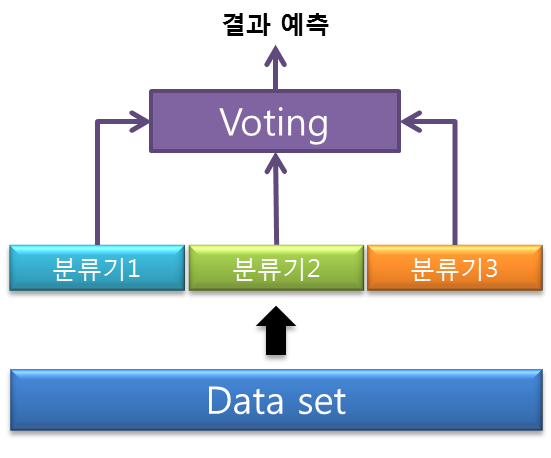

### 실습

1. 유방암 데이터를 불러오세요.

2. 종류가 다른 분류기 `LogisticRegression()`와 `KNeighborsClassifier()`를 불러오세요.

3. `VotingClassifier()`를 설정하세요.
    - estimator : [('LR',lr_clf),('KNN',knn_clf)]
    - voting : soft 설정

4. 데이터를 나누고 `VotingClassifier()`를 학습시켜 정확도를 예측해보세요.

5. 다른 분류기를 개별로 사용했을 때 결과를 출력해보세요.

6. 앙상블 학습을 했을 때와 그렇지 않을 때의 결과가 어떻게 다른지 확인해보세요.

In [1]:
import pandas as pd
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 유방암 데이터 불러오기
cancer = load_breast_cancer()

# 데이터 프레임을 만들기
data_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)

# Voting과 비교할 각각 다른 분류기 불러오기
# KNeighborsClassifier, LogisticRegression
lr_clf = LogisticRegression(max_iter = 5000) # Convergence를 위해 max_iter를 5000으로 설정
knn_clf = KNeighborsClassifier()

# Voting에 사용할 분류기
# 분류기로 LogisticRegressor와 KNeighborClassifier를 사용합니다.
# Voting 방식은 Soft Voting을 사용합니다.
vo_clf = VotingClassifier(estimators = [('LR',lr_clf),('KNN',knn_clf)], voting = 'soft')

# 학습 데이터와 검증 데이터로 나누기
X_train, X_test, Y_train, Y_test = train_test_split(cancer.data,cancer.target, test_size=0.2, random_state=0)

# Voting Classifier 학습
vo_clf.fit(X_train,Y_train)

# Voting 결과 예측
pred = vo_clf.predict(X_test)
print('Voting Classifier 정확도 : {0:.4f}'.format(accuracy_score(Y_test, pred)))

# 다른 분류기를 각각 학습했을 때 결과 예측
# classifiers에 lr_clf, knn_clf를 넣어주세요.
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train,Y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print("{0} 정확도 : {1:.4f}".format(class_name, accuracy_score(Y_test, pred)))

Voting Classifier 정확도 : 0.9474
LogisticRegression 정확도 : 0.9474
KNeighborsClassifier 정확도 : 0.9386


---

### 2-2. 앙상블 학습 (2)

### Bagging

Bagging은 Voting과 달리 예측할 때 사용하는 분류기를 동일한 분류기로 사용합니다.

Voting과의 차이점은 전체 데이터에서 데이터 샘플링을 하여 각 분류기 별로 서로 다른 데이터를 가져가 학습하는 것입니다.

Bagging의 대표적인 알고리즘으로 랜덤 포레스트(Random Forest)가 있습니다. 랜덤 포레스트를 실습해보겠습니다.

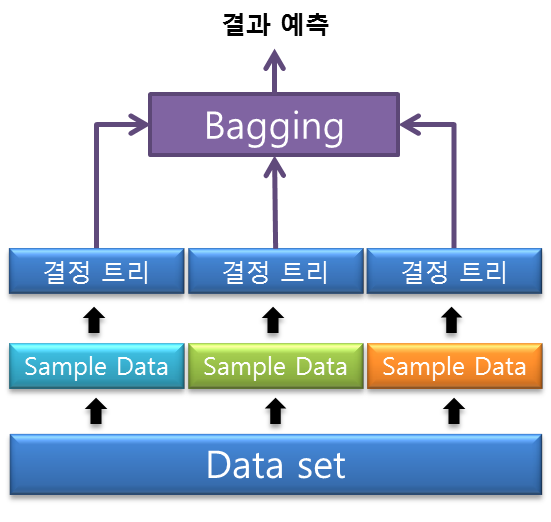

 ### 랜덤 포레스트

랜덤 포레스트는 앙상블 알고리즘 중 비교적 빠른 속도를 가지고 있고 높은 예측 성능을 보입니다.

랜덤 포레스트의 분류기는 의사결정트리를 사용합니다.

- `RandomForestClassifier()`
    - n_estimators : 결정 트리 개수 지정
    - max_depth : 트리의 depth 지정
    - min_samples_leaf : 리프 노드의 최소 샘플수
    - min_samples_split : 내부 노드를 분할하는데 필요한 최소 샘플 수

### 실습

1. 작성된 코드를 보고 따라가며 이해해보세요.

2. `param` 의 값을 바꿔가며 결과가 어떻게 변하는지 확인해보세요.

3. 검증 데이터 예측 정확도가 97%가 넘도록 `param`을 설정해보세요.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

# 유방암 데이터 세트 불러오기
bc = load_breast_cancer()

# 학습 데이터와 검증 데이터로 분할하기
X_train, X_test, Y_train, Y_test = train_test_split(bc.data, bc.target, test_size = 0.2, random_state = 121)

# RandomForestClassifier 객체 불러오기
rfc = RandomForestClassifier()

# GridSearchCV에 넣을 파라미터
param ={
    'n_estimators'      : [1],
    'max_depth'         : [1,2],
    'min_samples_leaf'  : [1,2],
    'min_samples_split' : [2,3]
}

# GridSearchCV 불러오기
grid_rfc = GridSearchCV(rfc, param_grid = param)

# RandomForestClassifier 학습
grid_rfc.fit(X_train, Y_train)

# 최적의 파라미터와 최고 예측 정확도 계산
print('최적 파라미터      : ', grid_rfc.best_params_)
print('최고 예측 정확도   : {0:.4f}'.format(grid_rfc.best_score_))

# 최적의 파라미터로 학습된 트리 Estimator 가져오기
estimator = grid_rfc.best_estimator_

# 검증 데이터로 결과 예측
pred = estimator.predict(X_test)
print('검증 데이터 정확도 : {0:.4f}'.format(accuracy_score(Y_test, pred)))




---